In [1]:
# Importing the libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Downloading the dataset using tensor.keras and check total size of dataset

(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
# Test dataset

X_test.shape

(10000, 32, 32, 3)

In [4]:
#Checking class labels

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Instead of taking 2D array for class labels we are now converting 2D array into 1D array or flatten array for getting class labels in single array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
# Class label for dataset

classes = ["airplane","automoile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [7]:
classes[2]

'bird'

In [8]:
# Showing Dataset or checking each image

def plot_sample(X,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

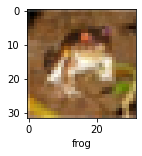

In [9]:
# This is showing the data sample with class label

plot_sample(X_train, y_train, 0)

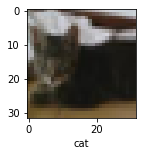

In [10]:
plot_sample(X_train, y_train, 9)

In [11]:
'''
Here we will normalize the value of dataset as you can see here that, we have
dataset value between 0 to 255. But we need dataset value between 0 to 1, so 
we will divide the value with 255. We need the value of dataset between 0 to 1 
bacause our Convolutional Neural Network (CNN) have the weights value and all 
the values including the prediction value is between 0 to 1.
'''
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train / 255
X_test = X_test / 255


In [13]:
# Building Artificial Neural Network

''' In this ANN we have flatten layers which convert the input into
1D array 1 Column array, then input shape of our dataset is 32,32,2
 then 30000 is tarin dataset and test is 10000, after that last we have 10 
 which is 10 labels of dataset in this ann '''


ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(30000, activation='relu'),
    layers.Dense(10000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)



Epoch 1/5
   6/1563 [..............................] - ETA: 2:36:28 - loss: 2.4997 - accuracy: 0.0833

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-ad101af8cc55>", line 20, in <module>
    ann.fit(X_train, y_train, epochs = 5)
  File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 947, in _call
  

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Checking the test dataset prediction

ann.evaluate(X_test, y_test)

In [17]:
# Printing precision report

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 42s 135ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.45      0.50      1000
           1       0.41      0.77      0.54      1000
           2       0.45      0.25      0.32      1000
           3       0.36      0.23      0.28      1000
           4       0.52      0.30      0.38      1000
           5       0.30      0.61      0.40      1000
           6       0.59      0.43      0.49      1000
           7       0.73      0.39      0.51      1000
           8       0.45      0.78      0.57      1000
           9       0.60      0.32      0.42      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [21]:
# Now train the dataset on Convolutional Neural Network


cnn = models.Sequential([
    
    # adding CNN layers here
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # These filters detect the edges in the images
    layers.MaxPooling2D((2,2)), #kernel size or window size
    
    layers.Conv2D(filters=64,kernel_size=(1,1), activation='relu'), # These filters detect the edges in the images
    layers.MaxPooling2D((2,2)), #kernel size or window size
    
    layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'), # These filters detect the edges in the images
    layers.MaxPooling2D((2,2)), #kernel size or window size
    # This is dense network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # softmax activation is used to normalize the distribution probability
])

In [22]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 224s 143ms/step - loss: 1.5828 - accuracy: 0.4196
Epoch 2/15
1563/1563 [==============================] - 221s 142ms/step - loss: 1.2440 - accuracy: 0.5599
Epoch 3/15
1563/1563 [==============================] - 220s 141ms/step - loss: 1.1007 - accuracy: 0.6145
Epoch 4/15
1563/1563 [==============================] - 215s 138ms/step - loss: 1.0060 - accuracy: 0.6488
Epoch 5/15
1563/1563 [==============================] - 224s 143ms/step - loss: 0.9314 - accuracy: 0.6794
Epoch 6/15
1563/1563 [==============================] - 222s 142ms/step - loss: 0.8746 - accuracy: 0.6993
Epoch 7/15
1563/1563 [==============================] - 219s 140ms/step - loss: 0.8224 - accuracy: 0.7131
Epoch 8/15
1563/1563 [==============================] - 226s 145ms/step - loss: 0.7773 - accuracy: 0.7293
Epoch 9/15
1563/1563 [==============================] - 223s 142ms/step - loss: 0.7358 - accuracy: 0.7441
Epoch 10/15
1563/1563 [=======================

In [24]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9645 - accuracy: 0.6921


[0.9645188450813293, 0.6920999884605408]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [28]:
# Because of testing data is in 2D array as seen above
# Now we converting our 2D array into 1D array by using reshaping it

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

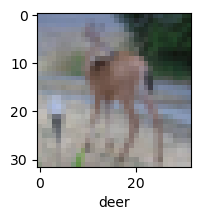

In [31]:
plot_sample(X_test, y_test, 100)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5] # The values are in probability distribution b/w 0 and 1

313/313 [==============================] - 2s 6ms/step


array([[4.76512313e-02, 1.23385427e-04, 1.12827346e-01, 7.56750286e-01,
        2.08092984e-02, 2.43608989e-02, 1.09747145e-02, 9.50678159e-03,
        1.24308271e-02, 4.56519611e-03],
       [1.45979291e-02, 3.55724320e-02, 6.22814014e-07, 4.24524023e-06,
        2.58136424e-06, 1.62282365e-08, 9.64529168e-09, 6.32398667e-07,
        9.48963761e-01, 8.57873820e-04],
       [2.59418413e-02, 1.28226697e-01, 1.67527352e-03, 1.00263851e-02,
        1.46325142e-03, 1.15714525e-03, 2.61244742e-04, 3.61835613e-04,
        7.80285835e-01, 5.06005324e-02],
       [9.75204289e-01, 4.19832906e-03, 6.58062287e-04, 1.18207745e-03,
        3.57795763e-03, 8.74078523e-06, 1.75437992e-06, 5.06156575e-05,
        1.37479687e-02, 1.37020182e-03],
       [1.06596235e-06, 4.29390496e-07, 8.18209536e-03, 3.53051932e-03,
        8.10156882e-01, 2.13227540e-04, 1.77909315e-01, 1.44055059e-06,
        4.48026549e-06, 5.98784936e-07]], dtype=float32)

In [35]:
# To normalize these above values we use argmax function
# The arg max will select the highest value index
# [..np.argmax..] This type of coding called list comphression 


y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

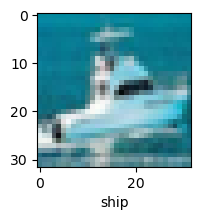

In [39]:
plot_sample(X_test, y_test, 1200)

In [40]:
classes[y_classes[1200]]

'ship'